In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)

# <center>Modelos Lineales</center>

Se consideran modelos lineales aquellos en los cuales la variable a predecir $y$ es una combinación lineal de las características $x_1, x_2...$ 

\begin{equation}
    \hat y = w_0 + w_1x_1 + w_2x_2 + ...
\end{equation}

Los valores $w_0, w_1, w_2...$ son los coeficientes de la regresión y por tanto son aquellos que determinan el modelo y son el objetivo de las diferentes técnicas que se estudiarán. El coeficiente $w_0$ recibe el nombre de intercepto. En Skilearn, luego de entrenar un estimador, para obtener el valor de $w_0$ usamos <code>model.intercept_</ code>, para los demás usamos <code>model.coef_</ code>.

El módulo <code>linear_regression</ code> de Skilearn contiene una gran variedad de modelos lineales y técnicas que podemos utilizar con estos. En el presente notebook se verán algunos de los principales tales como

   - <code>LinearRegression</ code>
   - <code>Ridge</ code>
   - <code>Lasso</ code>
   - <code>SGDRegressor</ code>

## <code>LinearRegression</code>

Este es el algoritmo de regresión lineal más básico y utiliza Ordinary Least Square (OLS) para hallar en valor de los coeficientes $w_i$, esto es, minimizar la suma cuadrática de los residuales entre la variable target $y$ y la combinación lineal de las características (features) $\textbf{X}$: 


\begin{equation}
   \text{Min}  \sum_{i=1}^n (X_i\cdot w - y_i)^2 
\end{equation}

A continuación un ejemplo del uso de <code>LinearRegression</code> utiliando una única feature. Se utiliza la base de datos de autimóviles.

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [3]:
# Una pequeña limpieza
# Columnas del DataFrame
df.columns = df.columns.str.replace("-|/", "_", regex=True)
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L_100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

Si bien no existe una planilla estricta con la cual se contruyen los modelos de ML, esto suelen seguir algunos estándares:

   - Separar los datos en features $\textbf{X}$ y target $y$.
   - Dividir los conjuntos anteriores en datos para entrenamiento (training set) y datos para testeo 
       (testing set) del modelo luego de ser entrenado. 
   - Entrenar el modelo utilizando los datos de entrenamiento.
   - Utilizar el modelo para predecir.
   
Entre cada uno de estos pasos pueden existir tantos pasos intermedios como lo requiera el trabajo a realizar, por ejemplo, es habitual realizar una estandarización de los datos. 
  

In [5]:
# 1.
# Separemos los datos en features y target
# Features
X = df['engine_size'].values.reshape(-1,1)

# target
y = df['price'].values.reshape(-1,1)

In [6]:
X.shape, y.shape

((196, 1), (196, 1))

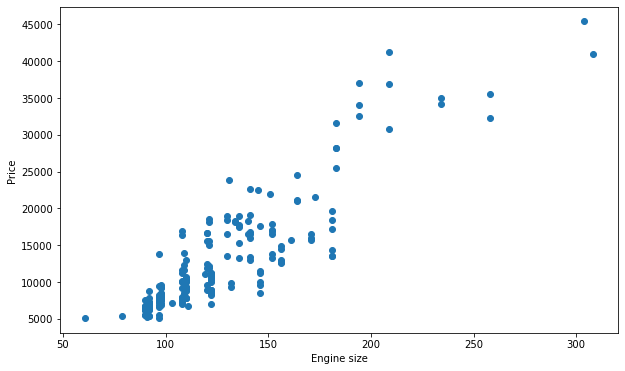

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y)

ax.set_xlabel(f"Engine size")
ax.set_ylabel(f"Price")
plt.show()

In [8]:
# 2.
# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [9]:
len(X), len(X_train), len(X_test)

(196, 156, 40)

In [10]:
print(f"Porcentaje datos de prueba = {len(X_test)/len(X)*100: .2f}%")

Porcentaje datos de prueba =  20.41%


In [11]:
# 3. 
# Estimador y predictor
linear = LinearRegression()

# 4. Entrenamiento/Estimación
linear.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictor
# Luego se pueden realizar predicciones
# Predicción para los datos de entrenamiento
y_pred = linear.predict(X_train)

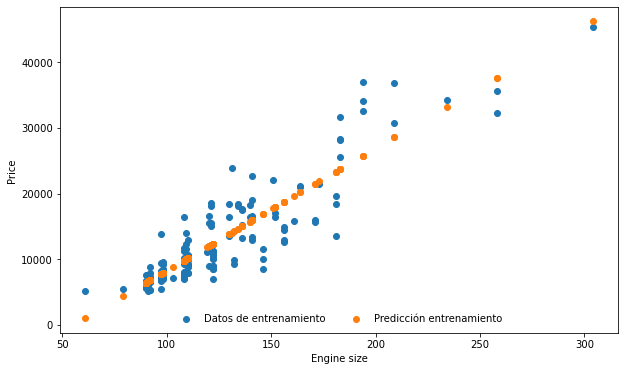

In [13]:
# Representación gráfica de la predicción
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_train, y_train, label="Datos de entrenamiento")
ax.scatter(X_train, y_pred,  label="Predicción entrenamiento")

ax.set_xlabel(r'Engine size')
ax.set_ylabel(r'Price')
plt.legend(frameon=False, ncol=2, loc="lower center")
plt.show()

Más adelante se hablará con mayor detalle sobre las métricas, por ahora las utilizaremos sin dar mayores detalles.

In [14]:
# Métricas de la predicción
print(f"R2_train = {linear.score(X_train, y_train)}")
print(f"R2_test  = {linear.score(X_test, y_test)}")

R2_train = 0.8123324009408551
R2_test  = 0.7163191178271022


In [15]:
# Los coeficientes (parámetros del modelo) de la regresión lineal
print(f"m = {linear.coef_}")
print(f"b = {linear.intercept_}")

m = [[185.76252361]]
b = [-10272.70309861]


In [16]:
# Predicciones con el modelo
y_pred_test = linear.predict(X_test)
y_pred_test[:10]

array([[ 9975.41197445],
       [23350.31367409],
       [23350.31367409],
       [10161.17449806],
       [33195.72742522],
       [17963.20048952],
       [ 6817.44907315],
       [ 7746.26169118],
       [16848.62534788],
       [ 6445.92402594]])

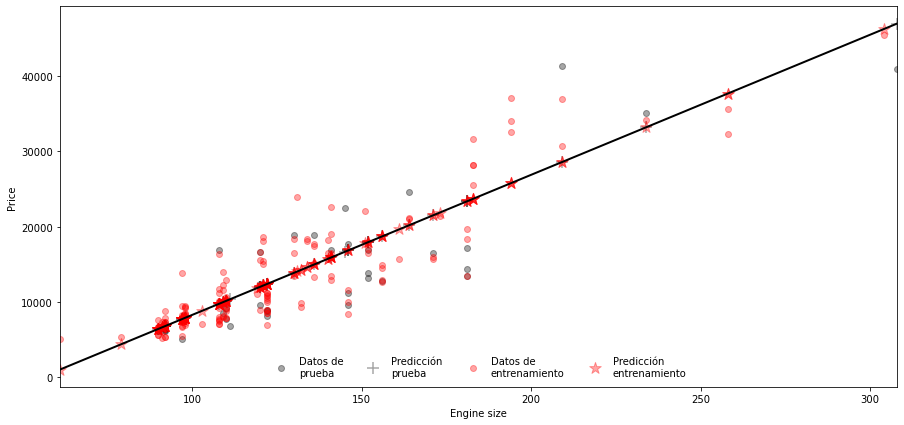

In [17]:
# Representación gráfica de la predicción + datos de prueba
fig, ax = plt.subplots(figsize=(15, 7))

ax.scatter(X_test,  y_test,      color='black', label=f'Datos de\nprueba',          marker="o", alpha=0.35)
ax.scatter(X_test,  y_pred_test, color='black', label=f'Predicción\nprueba',        marker="+", s=150, alpha=0.35)
ax.scatter(X_train, y_train,     color='red',   label=f'Datos de\nentrenamiento',   marker="o", alpha=0.35)
ax.scatter(X_train, y_pred,      color='red',   label=f'Predicción\nentrenamiento', marker="*", s=150, alpha=0.35)

x = np.linspace(min(X)[0], max(X)[0], 100)
ax.plot(x, (linear.coef_[0][0]*x + linear.intercept_[0]), color="k", linewidth=2)

ax.set_xlim( min((min(X_train),min(X_test))), max((max(X_train),max(X_test))) )
ax.set_xlabel(r'Engine size')
ax.set_ylabel(r'Price')
plt.legend(frameon=False, ncol=4, loc="lower center")
plt.show()

## <code>Ridge</code>

Ridge hace parte de los métodos de regularización. Estos buscan penalizar los coeficientes $w_i$ del modelo con el fin de controlar su valor impidiendo que crescan demasiado y, en algunos casos, volviéndolos nulos, esto último característica propia de la regresión de Lasso que veremos más adelante. El objetivo de la regresión de Ridge es minimizar la función de costo,  

\begin{equation}
   \text{Min}  \sum_{i=1}^n (X_i\cdot w - y_i)^2 + \alpha ||w||^2
\end{equation}

que se puede ver como compuesta por dos partes; un OLS más una penalización a los coeficientes dada por la expresión $\alpha ||w||^2$. Al adherir esta última componente se busca que los valores de los $w_i$ no crescan desproporcionalmente. $\alpha \geq 0$ es conocido como el **parámetro de complejidad** y su valor determina la magnitud de la regularización, un mayor valor de este implica una mayor regularización pues los coeficientes del modelo tendrán que disminuir su valor para poder compensar el alza en la función de costo. 

Como se puede ver, el termino que induce la regularización $\alpha ||w||^2$ implica una suma de los cuadrados de los coeficientes del modelo, esto tiene una implicación sobre la naturaleza de los datos con los cuales se realiza el entrenamiento: se deben normalizar o escalar previamente principalmente por dos razones. Imaginemos que tenemos un modelo para predecir el precio de un coche utilizando como features el tamaño del motor en $cm^3$ y el número de cilíndros que este tiene (magnitud adimensional), mientras la primera variable puede tener valores que abarquen un gran rango la segunda estará mucho más limitada (entre $4$ y $8$ para la base de datos que estamos trabajando) y por tanto el tamaño del motor tendrá un mayor impacto sobre el precio del coche dejando quizá muy poco protagonismo al número de cilíndros, lo cual no es un comportamiento esperado, esta es la primera razón por la que es necesario que todas las features que se utilicen para el modelo estén escaladas a un determinado rango. La segunda razón es un poco más obvia, dimensionalmente no es correcto sumar cantidades de diferente naturaleza, no podemos sumar peras con manzanas. En el [link]("https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29") hay una discusión interesante al respecto. 

A continuación un ejemplo de aplicación de Ridge.

#### <code>Ridge</code> sin estandarización de las features

In [18]:
df.num_of_cylinders.unique(), df.num_of_doors.unique()

(array(['four', 'six', 'five', 'three', 'eight'], dtype=object),
 array(['two', 'four'], dtype=object))

In [19]:
def name_to_number(x):
    if x=="two":   return 2
    if x=="three": return 3
    if x=="four":  return 4
    if x=="five":  return 5
    if x=="six":   return 6
    if x=="eight": return 8
    if x=="twelve": return 12
    else: return x #sólo para evitar errores si se corre varias veces
    
df[["num_of_cylinders", "num_of_doors"]] = df[["num_of_cylinders", "num_of_doors"]].map(name_to_number)

In [20]:
df.num_of_cylinders.unique(), df.num_of_doors.unique()

(array([4, 6, 5, 3, 8]), array([2, 4]))

In [21]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L_100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

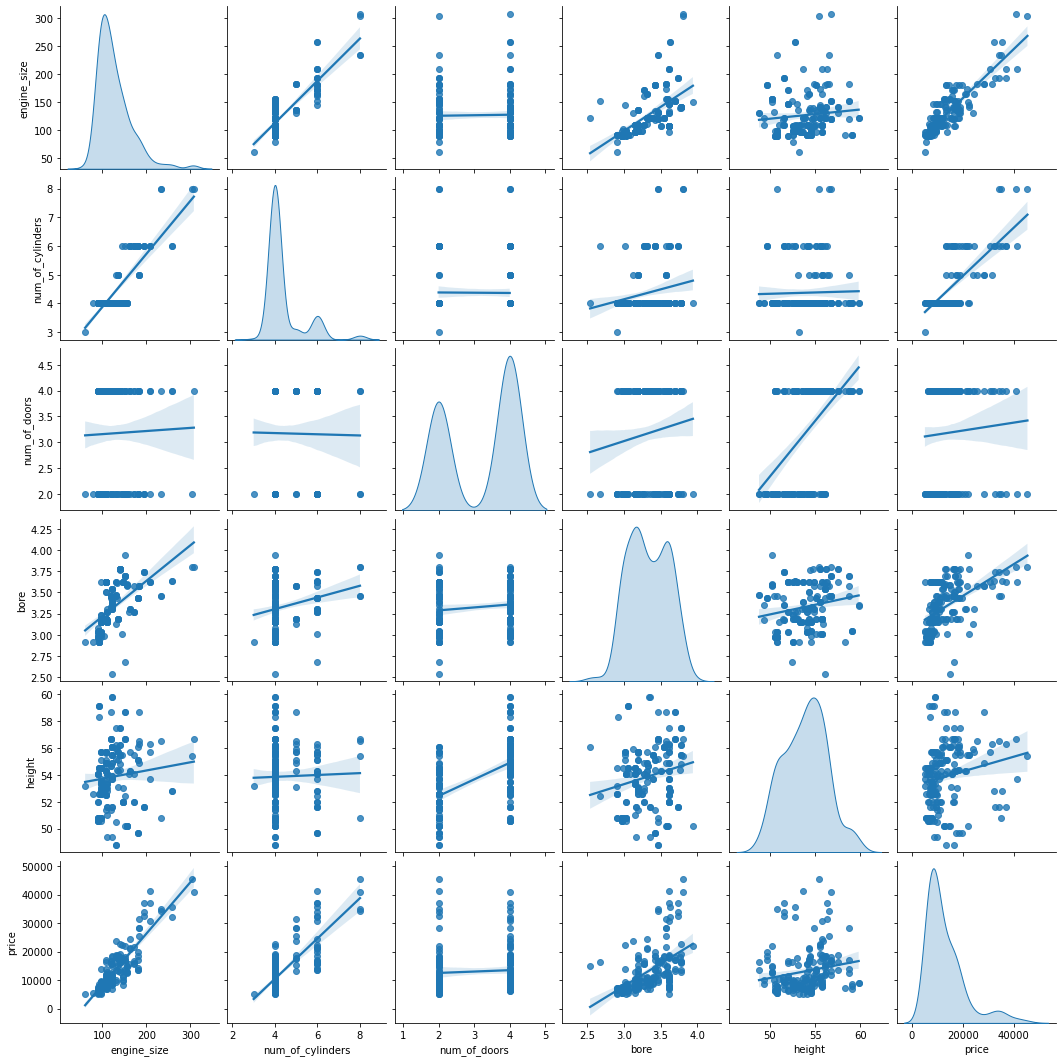

In [22]:
# Features para el modelo
sel_features = ["engine_size", "num_of_cylinders", "num_of_doors", "bore", "height"]
target = "price"

X = df[sel_features]
y = df[target]

# pairplot
sbn.pairplot(pd.concat([X,y], axis=1), kind="reg", diag_kind="kde")
plt.show()

In [23]:
pd.concat([X,y], axis=1).corr()

,engine_size,num_of_cylinders,num_of_doors,bore,height,price
engine_size,1.000000,0.835121,0.023694,0.601384,0.100518,0.889265
num_of_cylinders,0.835121,1.000000,-0.010059,0.218225,0.025258,0.771588
num_of_doors,0.023694,-0.010059,1.000000,0.126117,0.515880,0.061182
bore,0.601384,0.218225,0.126117,1.000000,0.199490,0.544375
height,0.100518,0.025258,0.515880,0.199490,1.000000,0.182407
price,0.889265,0.771588,0.061182,0.544375,0.182407,1.000000


In [24]:
# Datos de entrenamiento y prueba/testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

######################## Ridge ########################

# Antes de entrenar el modelo se escoge el mejor valor de alpha.
# En el siguiente módulo se explicará en detalle este procedimiento
# de ajuste de los hiperparámetros de un modelo.
best_alpha = RidgeCV(alphas=np.linspace(0.01, 5000, 1000)).fit(X_train, y_train).alpha_

# Entrenamiento
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X=X_train, y=y_train)

Ridge(alpha=5.014994994994995)

In [25]:
######################## Linear ########################

# Con el fin de comparar, veamos qué resultado se obtendría
# utilizando una regresión lineal simple

# Entrenamiento
model_linear = LinearRegression().fit(X=X_train, y=y_train)
model_linear

LinearRegression()

In [26]:
# Métricas de la predicción
print("Modelo con regularización")
print(f"R2_train = {model_ridge.score(X_train, y_train)}")
print(f"R2_test  = {model_ridge.score(X_test, y_test)}\n")

# Métricas de la predicción
print("Modelo sin regularización")
print(f"R2_train = {model_linear.score(X_train, y_train)}")
print(f"R2_test  = {model_linear.score(X_test, y_test)}")

Modelo con regularización
R2_train = 0.8073310335913422
R2_test  = 0.619019684483234

Modelo sin regularización
R2_train = 0.8087520277644797
R2_test  = 0.6053803351191482


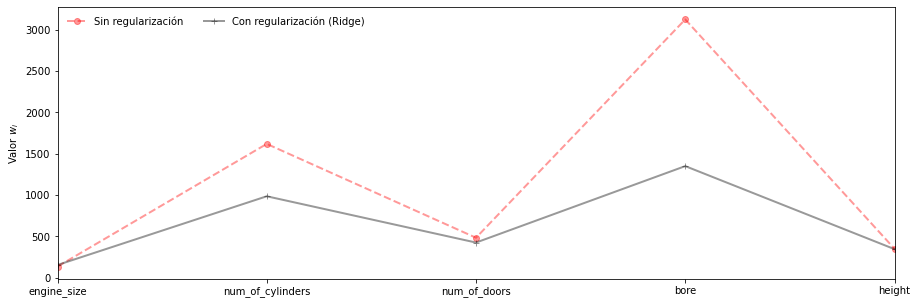

In [27]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(abs(model_linear.coef_), label="Sin regularización",          
                                 color="red", marker="o", linestyle="--", linewidth=2, alpha=0.4)
ax.plot(abs(model_ridge.coef_),  label="Con regularización (Ridge)",
                                 color="k",   marker="+", linestyle="-",  linewidth=2, alpha=0.4)

ax.set_xticks(ticks=range(len(sel_features)), labels=sel_features, rotation=0)
ax.set_ylabel(r"Valor $w_i$")
ax.set_xlim(0, len(sel_features)-1)
ax.legend(frameon=False, ncol=2)
plt.show()

Como se puede ver, el modelo sin regularización produce mayoritariamente coeficientes de mayor valor además de tener una mayor variación.

In [28]:
model_linear.coef_.std(), model_ridge.coef_.std()

(1284.6874205832332, 625.7838937281475)

Un análisis interesante sería ver el valor de los coeficientes para compararlos entre ellos y ver cuál de todos tiene mayor impacto sobre el precio del carro. 

In [29]:
coefs_df = pd.DataFrame({"w_ridge":model_ridge.coef_, "w_linear":model_linear.coef_},
                        index=sel_features).sort_values(by="w_ridge", ascending=False)
coefs_df

,w_ridge,w_linear
bore,1350.522425,3124.005500
num_of_cylinders,985.876187,1619.185250
height,346.587820,351.220313
engine_size,155.211286,136.187908
num_of_doors,-426.118129,-484.285715


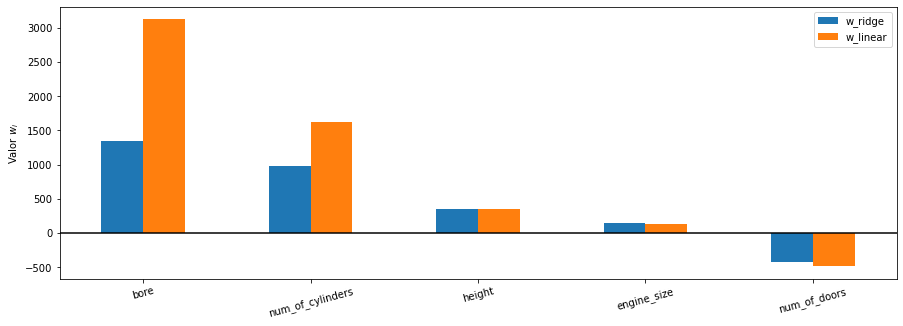

In [30]:
fig, ax = plt.subplots(figsize=(15,5))

coefs_df.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(sel_features)), labels=coefs_df.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()

Anteriormente, tanto al ver las correlaciones como en el pairplot, se pudo concluir que una de las variables de mayor impacto para predecir el valor del carro es $engine\_size$ al igual que $num\_of\_cylinders$. Sin embargo, el gráfico muestra todo lo contrario a este comportamiento esperado y esto se debe a que falta un paso fundamental para poder generar un buen modelo y es estandarizar los datos con los que se está trabajando. 

#### <code>Ridge</code> con estandarización de las features

Antes de entrenar el modelo es menester realizar una estandarización de los datos pues estos no están todos con las mismas unidades y sus rangos son bastante diferentes. Este proceso se puede realizar con ayuda de <code>StandardScaler</code>.

In [31]:
best_alpha_std = RidgeCV(alphas=np.linspace(0.01, 50, 1000))\
                                    .fit(
                                        X=StandardScaler().fit_transform(X_train),
                                        y=y_train)\
                                    .alpha_

# Ridge estandarizado
model_ridge_std = Pipeline(steps=[
                                ("Estandarización", StandardScaler()),
                                ("Regularización", Ridge(alpha=best_alpha_std))
                                ])

# Lineal estandarizado
model_linear_std = Pipeline(steps=[
                                ("Estandarización", StandardScaler()),
                                ("Lineal", LinearRegression())
                                ]).fit(X=X_train, y=y_train)

model_ridge_std.fit(X_train, y_train)

Pipeline(steps=[('Estandarización', StandardScaler()),
                ('Regularización', Ridge(alpha=2.1116816816816817))])

In [32]:
model_ridge_std.get_params()["Regularización"].coef_ < model_linear_std.get_params()["Lineal"].coef_

array([ True, False, False, False,  True])

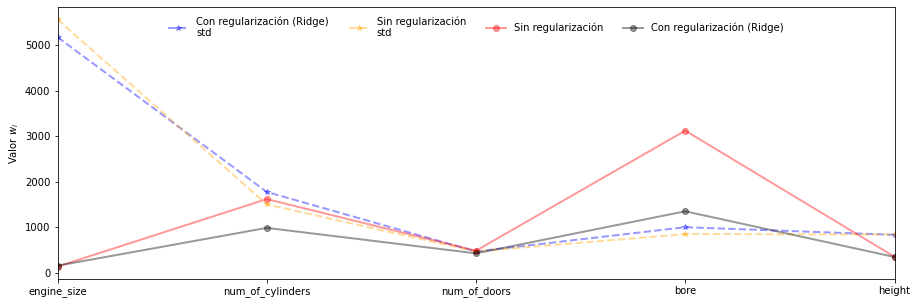

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
# Modelos con estandarización
ax.plot(abs(model_ridge_std.get_params()["Regularización"].coef_),  
                                 label="Con regularización (Ridge)\nstd",
                                 color="blue",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

ax.plot(abs(model_linear_std.get_params()["Lineal"].coef_),  
                                 label="Sin regularización\nstd",
                                 color="orange",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

# Modelos sin estandarización
ax.plot(abs(model_linear.coef_), label="Sin regularización",          
                                 color="red", marker="o", linestyle="-", linewidth=2, alpha=0.4)

ax.plot(abs(model_ridge.coef_),  label="Con regularización (Ridge)",
                                 color="k",   marker="o", linestyle="-", linewidth=2, alpha=0.4)


ax.set_xticks(ticks=range(len(sel_features)), labels=sel_features, rotation=0)
ax.set_ylabel(r"Valor $w_i$")
ax.set_xlim(0, len(sel_features)-1)
ax.legend(frameon=False, ncol=4, loc="upper center")
plt.show()

Escribir una conclusión sobre este gráfico.

Al igual que hicimos anteriormente, realicemos un análisis de los coeficientes obtenidos para los modelos.

In [34]:
coefs_std_df = pd.DataFrame({"w_ridge_std":model_ridge_std.get_params()["Regularización"].coef_,
                             "w_linear_std":model_linear_std.get_params()["Lineal"].coef_},
                            index=sel_features).sort_values(by="w_ridge_std", ascending=False)
coefs_std_df

,w_ridge_std,w_linear_std
engine_size,5178.922311,5568.515801
num_of_cylinders,1777.030710,1502.683714
bore,1001.017267,849.843151
height,833.169904,841.311855
num_of_doors,-467.016145,-469.698236


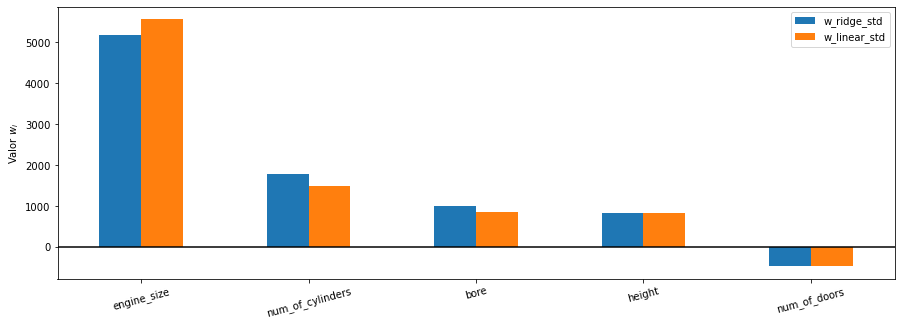

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
coefs_std_df.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(coefs_std_df.index)), labels=coefs_std_df.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()

Este es un comportamiento mucho más acorde a lo analizado inicialmente a partir de las correlaciones y gráficos. 

#### Efectos del hiperparámetro $\alpha$

Analicemos ahora cómo afecta el hiperparámetro $\alpha$ el valor de los coeficientes.

In [36]:
alphas = np.logspace(-2, 5, 200)
coefs  = []

# Para cada valor de alpha se obtienen los valores de los coeficientes
for alpha in alphas:
    model_alpha = Pipeline(
                        [("ss", StandardScaler()),
                         ("ridge", Ridge(alpha=alpha))]
                        ).fit(X=X_train, y=y_train)
    coefs.append(
                model_alpha.get_params()["ridge"].coef_
    )

coefs = np.array(coefs)
coefs.shape

(200, 5)

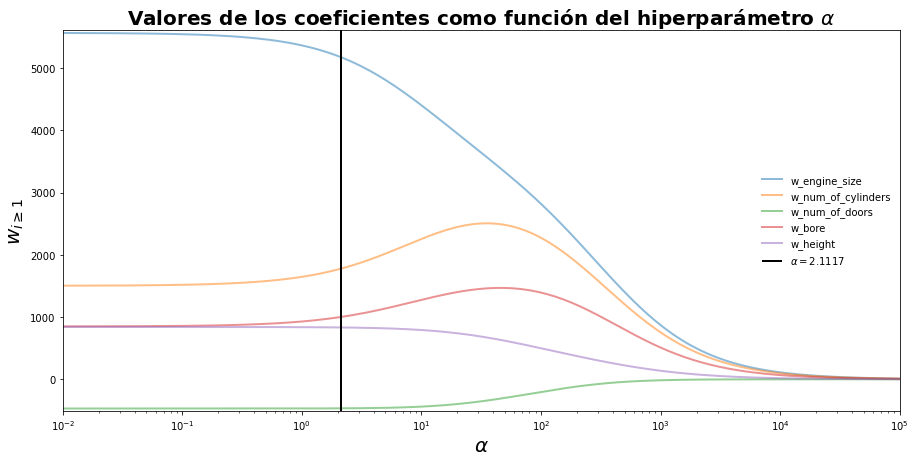

In [37]:
# Plot
fig, ax = plt.subplots(figsize=(15,7))

i = 0
for coef in coefs.T:
    ax.plot(alphas, coef, label=f"w_{sel_features[i]}", linewidth=2, alpha=0.5)
    i += 1
    
ax.set_xlim(min(alphas), max(alphas))
ax.set_ylim(min(coefs.flatten())-40, max(coefs.flatten())+40)
ax.vlines(x=model_ridge_std.get_params()["Regularización__alpha"],
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],
          color="k", linewidth=2, alpha=1,
          label=r"$\alpha=%.4f$"%model_ridge_std.get_params()["Regularización__alpha"])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}
ax.set_xlabel(r"$\alpha$", **font)
ax.set_ylabel(r"$w_{i\geq 1}$", **font)
ax.set_xscale("log")
ax.set_title(r"Valores de los coeficientes como función del hiperparámetro $\alpha$", **font)
plt.legend(frameon=False, ncol=1, loc="center right")
plt.show()

Como es notorio a partir del gráfico, las magnitudes de los coeficientes del modelo tienden a disminuir a medida que aumenta el parámetro de complejidad $\alpha$. Este es el efecto deseado con la regularización, al incrementar el valor de $\alpha$ se debe obtener una disminución en las magnitudes de los coeficientes pues estos se ven forzados a reducir su valor con el fin de minimizar la función de costo. 

## <code>Lasso</code>

Lasso es uno de los modelos con regularización y, como se dijo anteriormente, estos buscan penalizar los coeficientes $w_i$ con el fin de controlar su valor impidiendo que crescan demasiado. Lasso, en particular, sanciona con mayor fuerza los coeficientes pudiendo incluso volverlos nulos de manera que elimina la contribución de las respectivas features a nuestro target. Gracias a este comportamiento es ampliamente utilizado cuando el objetivo es reducir la dimensionalidad del conjunto de datos. Lasso consiste en minimizar la función de costo:  

\begin{equation}
   \text{Min } \frac{1}{2n} \sum_{i=1}^n (X_i\cdot w - y_i)^2 + \alpha ||w||
\end{equation}

que se puede ver como compuesta por dos partes; un OLS más una penalización a los coeficientes dada por la expresión $\alpha ||w||$. En contraste con Ridge, esta penalización permite realizar mayores restricciones sobre los coeficientes del modelo. Al igual que antes, el valor de $\alpha$ determina la magnitud de la regularización. En el argot se dice entonces que Lasso produce una regularización de tipo $L1$ mientras que Ridge una de tipo $L2$.

A continuación un ejemplo de aplicación de Lasso.

In [38]:
######################## Lasso ########################
# Antes de entrenar el modelo se escoge el mejor valor de alpha para Lasso.
best_alphaL = Pipeline([("Std", StandardScaler()),
                        ("LassoCV", LassoCV(alphas=np.linspace(0.01, 500, 5000), ))])\
                                        .fit(X=X_train,
                                             y=y_train).get_params()["LassoCV"].alpha_

print(f"alfa Lasso = {best_alphaL}")

# Entrenamiento
model_lasso_std = Pipeline([
                        ("Std", StandardScaler()),
                        ("Lasso", Lasso(alpha=best_alphaL))
                        ])\
                        .fit(X=X_train, y=y_train)
model_lasso_std

alfa Lasso = 4.810864172834567


Pipeline(steps=[('Std', StandardScaler()),
                ('Lasso', Lasso(alpha=4.810864172834567))])

In [39]:
# Métricas de la predicción
print("Modelo con regularización (Lasso)")
print(f"R2_train = {model_lasso_std.score(X_train, y_train)}")
print(f"R2_test  = {model_lasso_std.score(X_test, y_test)}")

Modelo con regularización (Lasso)
R2_train = 0.8087498552712548
R2_test  = 0.6064842526997573


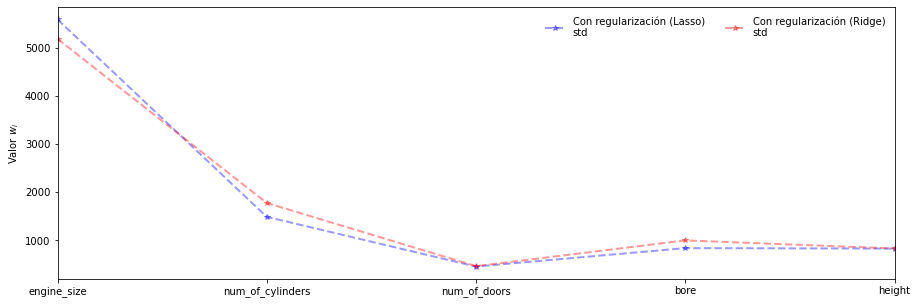

In [40]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(abs(model_lasso_std.get_params()["Lasso"].coef_),  
                                 label="Con regularización (Lasso)\nstd",
                                 color="blue",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

ax.plot(abs(model_ridge_std.get_params()["Regularización"].coef_),  
                                 label="Con regularización (Ridge)\nstd",
                                 color="red",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

ax.set_xticks(ticks=range(len(sel_features)), labels=sel_features, rotation=0)
ax.set_ylabel(r"Valor $w_i$")
ax.set_xlim(0, len(sel_features)-1)
ax.legend(frameon=False, ncol=3)
plt.show()

In [41]:
model_linear_std.get_params()["Lineal"].coef_

array([5568.51580062, 1502.68371424, -469.6982364 ,  849.84315132,
        841.31185481])

In [42]:
model_lasso_std.get_params()["Lasso"].coef_

array([5581.59896227, 1489.15562735, -459.08279276,  840.96108404,
        831.40249057])

In [43]:
coefs_std_Lasso_df = pd.DataFrame({"w_lasso_std":model_lasso_std.get_params()["Lasso"].coef_,
                             "w_linear_std":model_linear_std.get_params()["Lineal"].coef_},
                            index=sel_features).sort_values(by="w_lasso_std", ascending=False)
coefs_std_Lasso_df

,w_lasso_std,w_linear_std
engine_size,5581.598962,5568.515801
num_of_cylinders,1489.155627,1502.683714
bore,840.961084,849.843151
height,831.402491,841.311855
num_of_doors,-459.082793,-469.698236


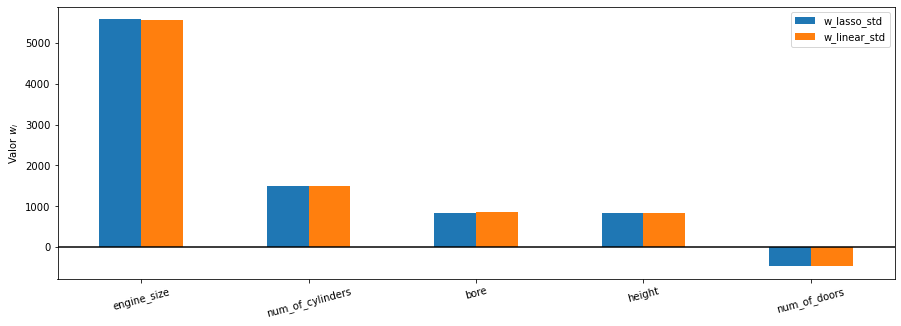

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
coefs_std_Lasso_df.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(coefs_std_Lasso_df.index)), labels=coefs_std_Lasso_df.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()

Una de los principales atractivos de Lasso es la eliminación del aporte de features altamente correlacionadas o de aquellas que no contribuyen considerablemente al modelo. Para ver esto adhiramos una feature que sea un múltiplo de otra ($num\_of\_cylinders$) y otra que sea un poco de ruido.

In [45]:
X

,engine_size,num_of_cylinders,num_of_doors,bore,height
0,130,4,2,3.47,48.8
1,130,4,2,3.47,48.8
2,152,6,2,2.68,52.4
3,109,4,4,3.19,54.3
4,136,5,4,3.19,54.3
...,...,...,...,...,...
191,141,4,4,3.78,55.5
192,141,4,4,3.78,55.5
193,173,6,4,3.58,55.5
194,145,6,4,3.01,55.5


In [46]:
np.random.seed(42)
X.loc[:,"new_feature1"] = 2*X["num_of_cylinders"] - 0.01*np.random.normal(size=X.shape[0])
X.loc[:,"new_feature2"] = np.random.normal(size=X.shape[0])
X

/tmp/ipykernel_36831/1526350335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,"new_feature1"] = 2*X["num_of_cylinders"] - 0.01*np.random.normal(size=X.shape[0])
/tmp/ipykernel_36831/1526350335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,"new_feature2"] = np.random.normal(size=X.shape[0])


,engine_size,num_of_cylinders,num_of_doors,bore,height,new_feature1,new_feature2
0,130,4,2,3.47,48.8,7.995033,-0.883857
1,130,4,2,3.47,48.8,8.001383,0.153725
2,152,6,2,2.68,52.4,11.993523,0.058209
3,109,4,4,3.19,54.3,7.984770,-1.142970
4,136,5,4,3.19,54.3,10.002342,0.357787
...,...,...,...,...,...,...,...
191,141,4,4,3.78,55.5,7.991436,1.876171
192,141,4,4,3.78,55.5,7.997859,0.950424
193,173,6,4,3.58,55.5,12.012457,-0.576904
194,145,6,4,3.01,55.5,11.998268,-0.898415


In [47]:
pd.concat([X,y], axis=1).corr()

,engine_size,num_of_cylinders,num_of_doors,bore,height,new_feature1,new_feature2,price
engine_size,1.000000,0.835121,0.023694,0.601384,0.100518,0.835192,-0.023404,0.889265
num_of_cylinders,0.835121,1.000000,-0.010059,0.218225,0.025258,0.999985,-0.013252,0.771588
num_of_doors,0.023694,-0.010059,1.000000,0.126117,0.515880,-0.009597,0.040481,0.061182
bore,0.601384,0.218225,0.126117,1.000000,0.199490,0.218668,-0.005217,0.544375
height,0.100518,0.025258,0.515880,0.199490,1.000000,0.025194,0.043845,0.182407
new_feature1,0.835192,0.999985,-0.009597,0.218668,0.025194,1.000000,-0.012128,0.771499
new_feature2,-0.023404,-0.013252,0.040481,-0.005217,0.043845,-0.012128,1.000000,0.019729
price,0.889265,0.771588,0.061182,0.544375,0.182407,0.771499,0.019729,1.000000


In [48]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=13)

best_alphaL = Pipeline([("Std", StandardScaler()),
                        ("LassoCV", LassoCV(alphas=np.linspace(0.01, 500, 5000), max_iter=int(1e6)))])\
                                        .fit(X=X_train_2,
                                             y=y_train_2).get_params()["LassoCV"].alpha_

print(f"alfa Lasso = {best_alphaL}")

# Entrenamiento
model_lasso_std_2 = Pipeline([
                        ("Std", StandardScaler()),
                        ("Lasso", Lasso(alpha=best_alphaL))
                        ])\
                        .fit(X=X_train_2, y=y_train_2)
model_lasso_std_2

alfa Lasso = 196.54537707541508


Pipeline(steps=[('Std', StandardScaler()),
                ('Lasso', Lasso(alpha=196.54537707541508))])

In [49]:
coefs_std_Lasso_df_2 = pd.DataFrame({"w_lasso_std":model_lasso_std_2.get_params()["Lasso"].coef_}, 
                                   index=X_train_2.columns).sort_values(by="w_lasso_std", ascending=False)
coefs_std_Lasso_df_2

,w_lasso_std
engine_size,5784.120365
num_of_cylinders,767.492619
height,544.391023
bore,340.567103
num_of_doors,0.000000
new_feature1,0.000000
new_feature2,0.000000


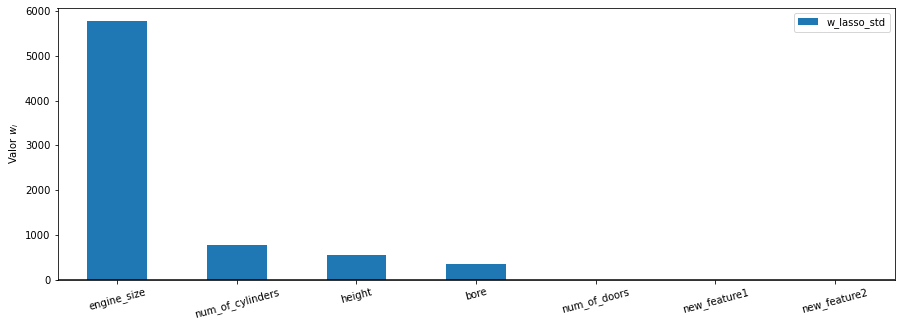

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
coefs_std_Lasso_df_2.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(coefs_std_Lasso_df_2.index)), labels=coefs_std_Lasso_df_2.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()

Como se puede ver, Lasso anula la contribución de las features que menos contribuyen al modelo y de aquellas que tienen alta correlación con otras. Este último aspecto es de bastante relevancia pues la existencia de features correlacionadas puede afectar considerablemente el valor de los coeficientes el modelo tornandolos inestables, especialmente de aquellos correspondientes a las features correlacionadas. 

## <code>ElasticNet</code>

Las redes elásticas se pueden pensar como una combinación de Lasso (L1) y Ridge (L2). Esta combinación tiene amplias ventajas pues permite heredar las características más valiosas de ambas técnicas como la posibilidad de eliminar las carácterísticas correlacionadas manteniendo una regularización sobre los coeficientes del modelo. La función de costo para este problema es

\begin{equation}
   \text{Min } \frac{1}{2n} \sum_{i=1}^n (X_i\cdot w - y_i)^2 + \alpha\rho ||w|| + \frac{\alpha(1-\rho)}{2}||w||^2
\end{equation}

En caso de tener $\rho=$<code>l1_ratio</code>$=1$ se obtiene Lasso, con <code>l1_ratio</code>$=0$ obtenemos Ridge. De la expresión de arriba se deduce $0\leq$<code>l1_ratio</code>$\leq 1$ .  Veamos un ejemplo.

In [51]:
######################## Lasso ########################
# Antes de entrenar el modelo se escoge el mejor valor de alpha para Lasso.
best_paramsEN = Pipeline([("Std", StandardScaler()),
                          ("ElasticNetCV", ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 500),
                                                        alphas=np.linspace(0.01, 50, 100), max_iter=int(1e6)))
                        ])\
                        .fit(X=X_train_2,
                         y=y_train_2)

best_alphaEN = best_paramsEN.get_params()["ElasticNetCV"].alpha_
best_l1EN    = best_paramsEN.get_params()["ElasticNetCV"].l1_ratio_

# Entrenamiento
model_EN_std = Pipeline([
                        ("Std", StandardScaler()),
                        ("EN", ElasticNet(alpha=best_alphaEN, l1_ratio=best_l1EN))
                        ])\
                        .fit(X=X_train_2, y=y_train_2)

model_EN_std

Pipeline(steps=[('Std', StandardScaler()),
                ('EN',
                 ElasticNet(alpha=24.752525252525253,
                            l1_ratio=0.997997995991984))])

In [52]:
# Métricas de la predicción
print("Modelo con regularización (Lasso)")
print(f"R2_train = {model_EN_std.score(X_train_2, y_train_2)}")
print(f"R2_test  = {model_EN_std.score(X_test_2, y_test_2)}")

Modelo con regularización (Lasso)
R2_train = 0.8223806150461732
R2_test  = 0.7432188300266638


In [53]:
coefs_std_EN_df = pd.DataFrame({"w_EN_std":model_EN_std.get_params()["EN"].coef_},
                            index=X_train_2.columns).sort_values(by="w_EN_std", ascending=False)
coefs_std_EN_df

,w_EN_std
engine_size,4375.590138
bore,1038.808356
num_of_cylinders,967.588116
new_feature1,920.215051
height,668.517180
new_feature2,-0.000000
num_of_doors,-22.895231


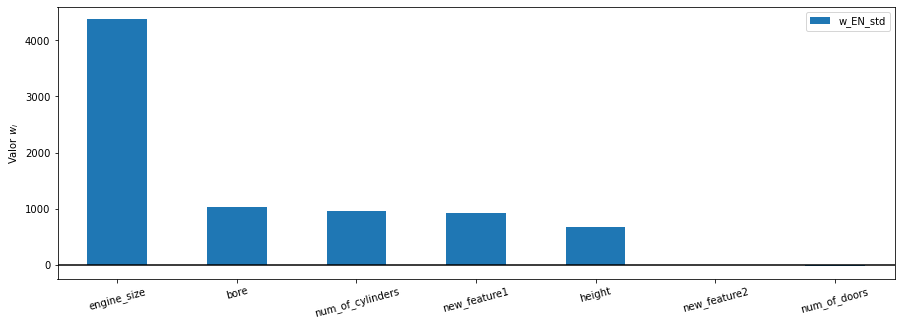

In [54]:
fig, ax = plt.subplots(figsize=(15,5))
coefs_std_EN_df.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(coefs_std_EN_df.index)), labels=coefs_std_EN_df.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()